# **MAJOR PROJECT 2**
# Exploratory Data Analysis



In [1]:
# Data Set : Netflix Original Films & IMDB Scores
# Link : https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores

In [2]:
#FOR COMPUTATION AND ANALYSIS
import pandas as pd
import numpy as np

In [3]:
#FOR VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df = pd.read_csv('/content/NetflixOriginals.csv', encoding='ISO-8859-1')
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [5]:
df.shape

(584, 6)

In [6]:
df.size

3504

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [8]:
df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [9]:
#ANALYSIS 1: TOTAL NUMBER OF LANGUAGES/ VARIATIONS

len(pd.unique(df['Language']))

38

In [10]:
#ANALYSIS 2: NUMBER OF GENRES PRESENT

df.Genre.nunique()

115

In [11]:
#ANALYSIS 3: THE NUMBER OF SHOWS IN EACH LANGUAGE

df.groupby(['Language']).size()

Language
Bengali                         1
Dutch                           3
English                       401
English/Akan                    1
English/Arabic                  1
English/Hindi                   2
English/Japanese                2
English/Korean                  1
English/Mandarin                2
English/Russian                 1
English/Spanish                 5
English/Swedish                 1
English/Taiwanese/Mandarin      1
English/Ukranian/Russian        1
Filipino                        2
French                         20
Georgian                        1
German                          5
Hindi                          33
Indonesian                      9
Italian                        14
Japanese                        6
Khmer/English/French            1
Korean                          6
Malay                           1
Marathi                         3
Norwegian                       1
Polish                          3
Portuguese                     12
Spani

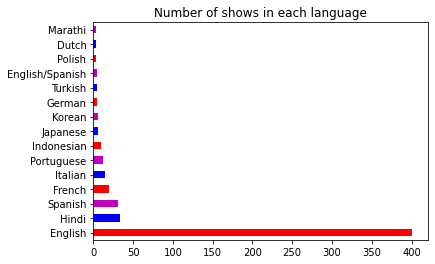

In [12]:
#ANALYSIS 4: VISUALISATION OF NUMBER OF SHOWS IN EACH LANGUAGE

lang=df['Language'].value_counts().head(15).plot(kind='barh',color=['red','blue','m'],title='Number of shows in each language')
display(lang)


In [13]:
#ANALYSIS 5: THE NUMBER OF SHOWS IN EACH GENRE

df.groupby(['Genre']).size()

Genre
Action              7
Action comedy       5
Action thriller     1
Action-adventure    1
Action-thriller     3
                   ..
War                 2
War drama           2
War-Comedy          1
Western             3
Zombie/Heist        1
Length: 115, dtype: int64

In [14]:
#ANALYSIS 6: SORTING THE DATA ACCORDING TO GENRE

s=df.sort_values("Genre")
s[["Title","Genre"]]

,Title,Genre
220,6 Underground,Action
372,Extraction,Action
5,Drive,Action
50,Earth and Blood,Action
39,Sentinelle,Action
...,...,...
219,War Machine,War-Comedy
516,The Ballad of Buster Scruggs,Western
49,The Ridiculous 6,Western
237,The Killer,Western


In [15]:
#ANALYSIS 7: SORTING THE DATA ACCORDING TO LANGUAGE

s=df.sort_values("Language")
s[["Title","Language"]]

,Title,Language
473,Rooting for Roona,Bengali
461,Ferry,Dutch
186,The Claus Family,Dutch
26,Just Say Yes,Dutch
291,Uncorked,English
...,...,...
6,Leyla Everlasting,Turkish
235,Stuck Apart,Turkish
132,One-Way to Tomorrow,Turkish
383,Paper Lives,Turkish


In [16]:
#ANALYSIS 8: TOP 10 LENGTHY MOVIES

l = df.sort_values("Runtime", ascending = False)
ln=l[['Title', "Runtime"]][:10]
ln

,Title,Runtime
561,The Irishman,209
328,Da 5 Bloods,155
581,Springsteen on Broadway,153
247,Citation,151
284,The Forest of Love,151
509,Raat Akeli Hai,149
7,The Last Days of American Crime,149
543,Ludo,149
194,Army of the Dead,148
5,Drive,147


In [17]:
#ANALYSIS 9: #VISUALTISATION OF THE 1O LENGTHY MOVIES AND SHOWS

fig_hist=px.bar(ln,x='Title',y='Runtime',title='10 most lengthy shows/movies')
fig_hist.show()

In [18]:
#ANALYSIS 10: AVERAGE RUNTIME OF ALL THE SHOWS

df['Runtime'].mean()

93.57705479452055

In [19]:
#ANALYSIS 11:TOP 15 MOST RATED SHOWS

r = df.sort_values("IMDB Score", ascending = False)
r[['Title', "IMDB Score"]][:15]

,Title,IMDB Score
583,David Attenborough: A Life on Our Planet,9.0
582,Emicida: AmarElo - It's All For Yesterday,8.6
581,Springsteen on Broadway,8.5
580,Winter on Fire: Ukraine's Fight for Freedom,8.4
579,Taylor Swift: Reputation Stadium Tour,8.4
578,Ben Platt: Live from Radio City Music Hall,8.4
577,Dancing with the Birds,8.3
576,Cuba and the Cameraman,8.3
573,Klaus,8.2
571,13th,8.2


In [20]:
#ANALYSIS 12: TOP 10 MOST RATED SHOWS/MOVIES

rating = r[['Title','IMDB Score']][:10]
fig_hist=px.bar(rating,x='Title',y='IMDB Score',title='10 most rated shows/movies')
fig_hist.show()

In [21]:
# ANALYSIS 13: SHOWS WITH IMDB SCORE GREATER THAT 8
d_high=df[df["IMDB Score"].values >= 8.0]
d_high

,Title,Genre,Premiere,Runtime,IMDB Score,Language
567,Struggle: The Life and Lost Art of Szukaiski,Documentary,"December 21, 2018",105,8.0,English
568,Chasing Coral,Documentary,"July 14, 2017",89,8.1,English
569,My Octopus Teacher,Documentary,"September 7, 2020",85,8.1,English
570,Rising Phoenix,Documentary,"August 26, 2020",106,8.1,English
571,13th,Documentary,"October 7, 2016",100,8.2,English
572,Disclosure: Trans Lives on Screen,Documentary,"June 19, 2020",107,8.2,English
573,Klaus,Animation/Christmas/Comedy/Adventure,"November 15, 2019",97,8.2,English
574,Seaspiracy,Documentary,"March 24, 2021",89,8.2,English
575,The Three Deaths of Marisela Escobedo,Documentary,"October 14, 2020",109,8.2,Spanish
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English


In [22]:
# ANALYSIS 14: SHOWS WITH IMDB SCORE LESS THAT 4
d_low=df[df["IMDB Score"].values <= 4.0]
d_low

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
5,Drive,Action,"November 1, 2019",147,3.5,Hindi
6,Leyla Everlasting,Comedy,"December 4, 2020",112,3.7,Turkish
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English
8,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.9,English


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'IMDB Score Counts')

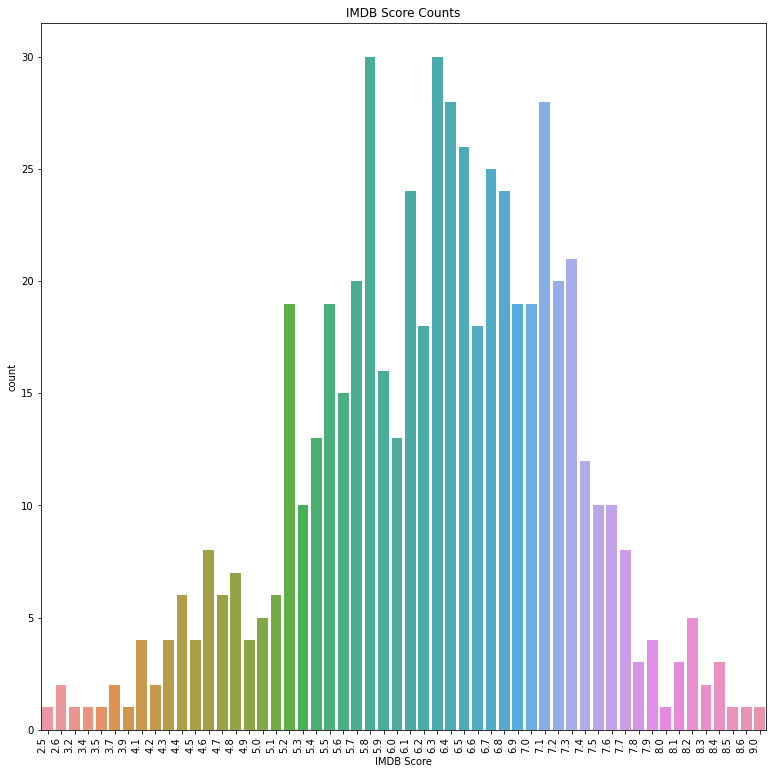

In [23]:
#ANALYSIS 15: VISUALISATION ODF THE IMDB SCORES OF ALL THE SHOWS

sns.countplot(df['IMDB Score'])
sns.countplot(df['IMDB Score']).set_xticklabels(sns.countplot(df['IMDB Score']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('IMDB Score Counts')